# Linear Classification

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
%matplotlib inline

def new_plot():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    return fig, ax

Linear functions can perform classification. Such a function is called the *decision boundary* or *linear separator*. A data set admitting a linear separator is considered *linearly seperable* and there exists a solution ot the function $h$ with zero cost.

In classification, the hypothesis $h_{\mathbf{w}}(\mathbf{x})$ is the linear function $\mathbf{w}\cdot\mathbf{w}$ passed through a *threshold function*, returning the classification of the input, rather than a real value, as in regression. If the data set is linearly seperable, the *percepton learning rule* will converge on an exact solution.

$$w_i \leftarrow w_i - \alpha (h_{\mathbf{w}}(\mathbf{x}) - y_j) \times x_{i}$$

## Sigmoid Function

The *sigmoid* or *logistic* function returns a value in the interval $(0,1)$, representing the probability that the point has the classification 1. In logistic regression, the vector product of the weights and inputs is passed through this logistic function. This function is differentiable at all points and it is continous in its input. The logistic funcion is a *softer* threshold function.

$$\sigma(u) = \dfrac{1}{1+e^{-u}}$$

$$h_{\mathbf{w}}(\mathbf{x}) = \dfrac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}$$

$$\sigma(\mathbf{w}^T\mathbf{x}) = P(y=1|\mathbf{w},\mathbf{x})$$


In [2]:
def sigmoid(u):
    return 1 / (1+math.e ** -u)

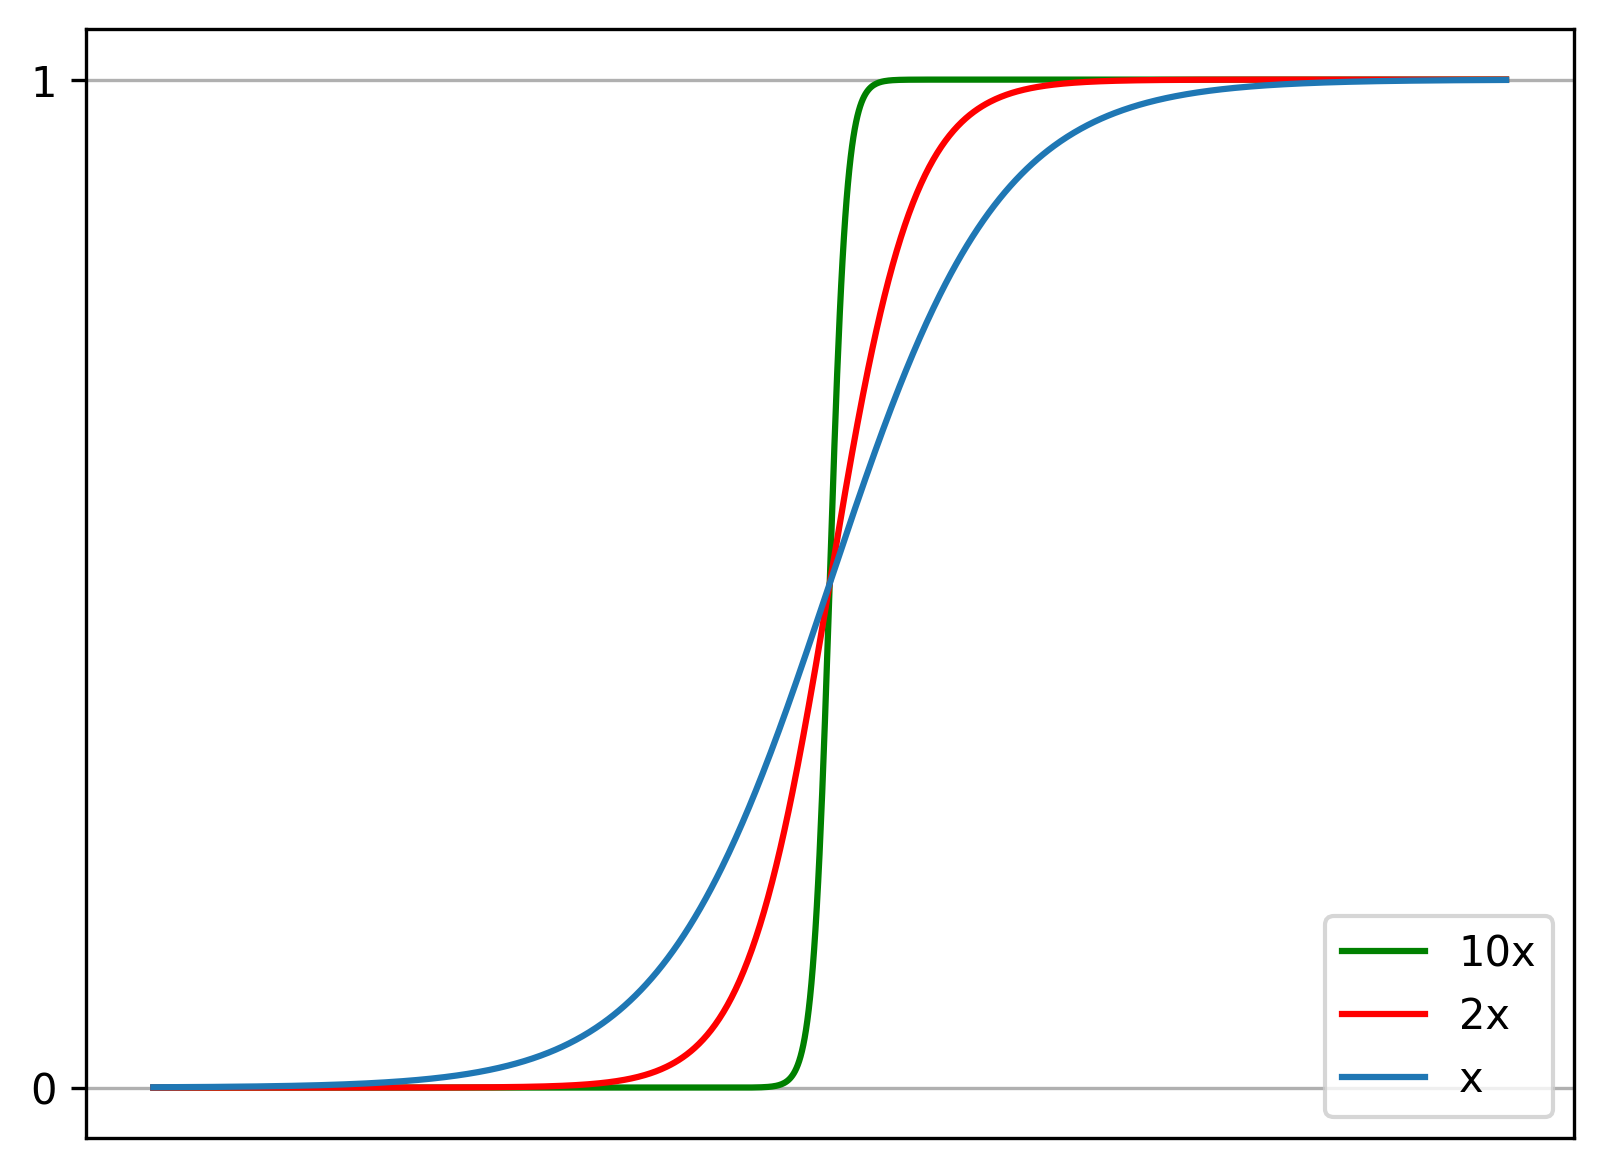

In [3]:
x = np.linspace(-8, 8, 1000)
f, ax = new_plot()
ax.set_xticks([])
#ax.set_yticks([])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid()
ax.plot(x, sigmoid(10 * x), 'green', label="10x")
ax.plot(x, sigmoid(2 * x), 'red', label="2x")
ax.plot(x, sigmoid(x), label="x")
ax.legend(loc='lower right')

## Cost Function


### Cross entropy cost

$$ L(\mathbf{w}) = \begin{cases} - \log(h_{\mathbf{w}}(\mathbf{x})), & \text{if } y = 1 \\ - \log(1-h_{\mathbf{w}}(\mathbf{x})), & \text{if } y = 0 \end{cases} $$

$$ L(\mathbf{w}) = -(y\log(h_{\mathbf{w}}(\mathbf{x})) + (1-y)\log(1-h_{\mathbf{w}}(\mathbf{x})))$$

$$g(\mathbf{w}) = -\frac{1}{N}\sum_n^N (y_{n}\log(h_{\mathbf{w}}(\mathbf{x}_n)) + (1-y_n)\log(1-h_{\mathbf{w}}(\mathbf{x}_n)))$$

$$\nabla g(\mathbf{w}) = -\frac{1}{N}\sum_n^N (y_{n} - h_{\mathbf{w}}(\mathbf{x}_n)\times \mathbf{x}_n$$

$$\mathbf{w}_i \leftarrow \mathbf{w}_i + \alpha\sum_n^N (y_{n} - h_{\mathbf{w}}(\mathbf{x}_n)\times \mathbf{x}_{n,i}$$


In [10]:
def create_minibatches(a, m):
    n = int(x.shape[0] / m)
    return np.array_split(a[:m * n], n), n

def h(W, X):
    return sigmoid(sum(W * X))


def logistic_regression(a, m, W, y, X):
    X = np.concatenate((np.ones((X.shape[0],1), dtype=int), X), axis=1)
    X, n = create_minibatches(X, m)
    y, n = create_minibatches(y, m)
    for b in range(n):
        for w in range(W.size):
            W[w] += a * sum([((h(W, X[b][x])) - y[b][x]) * X[b][x][w] for x in range(X[b].shape[0])])
    return W

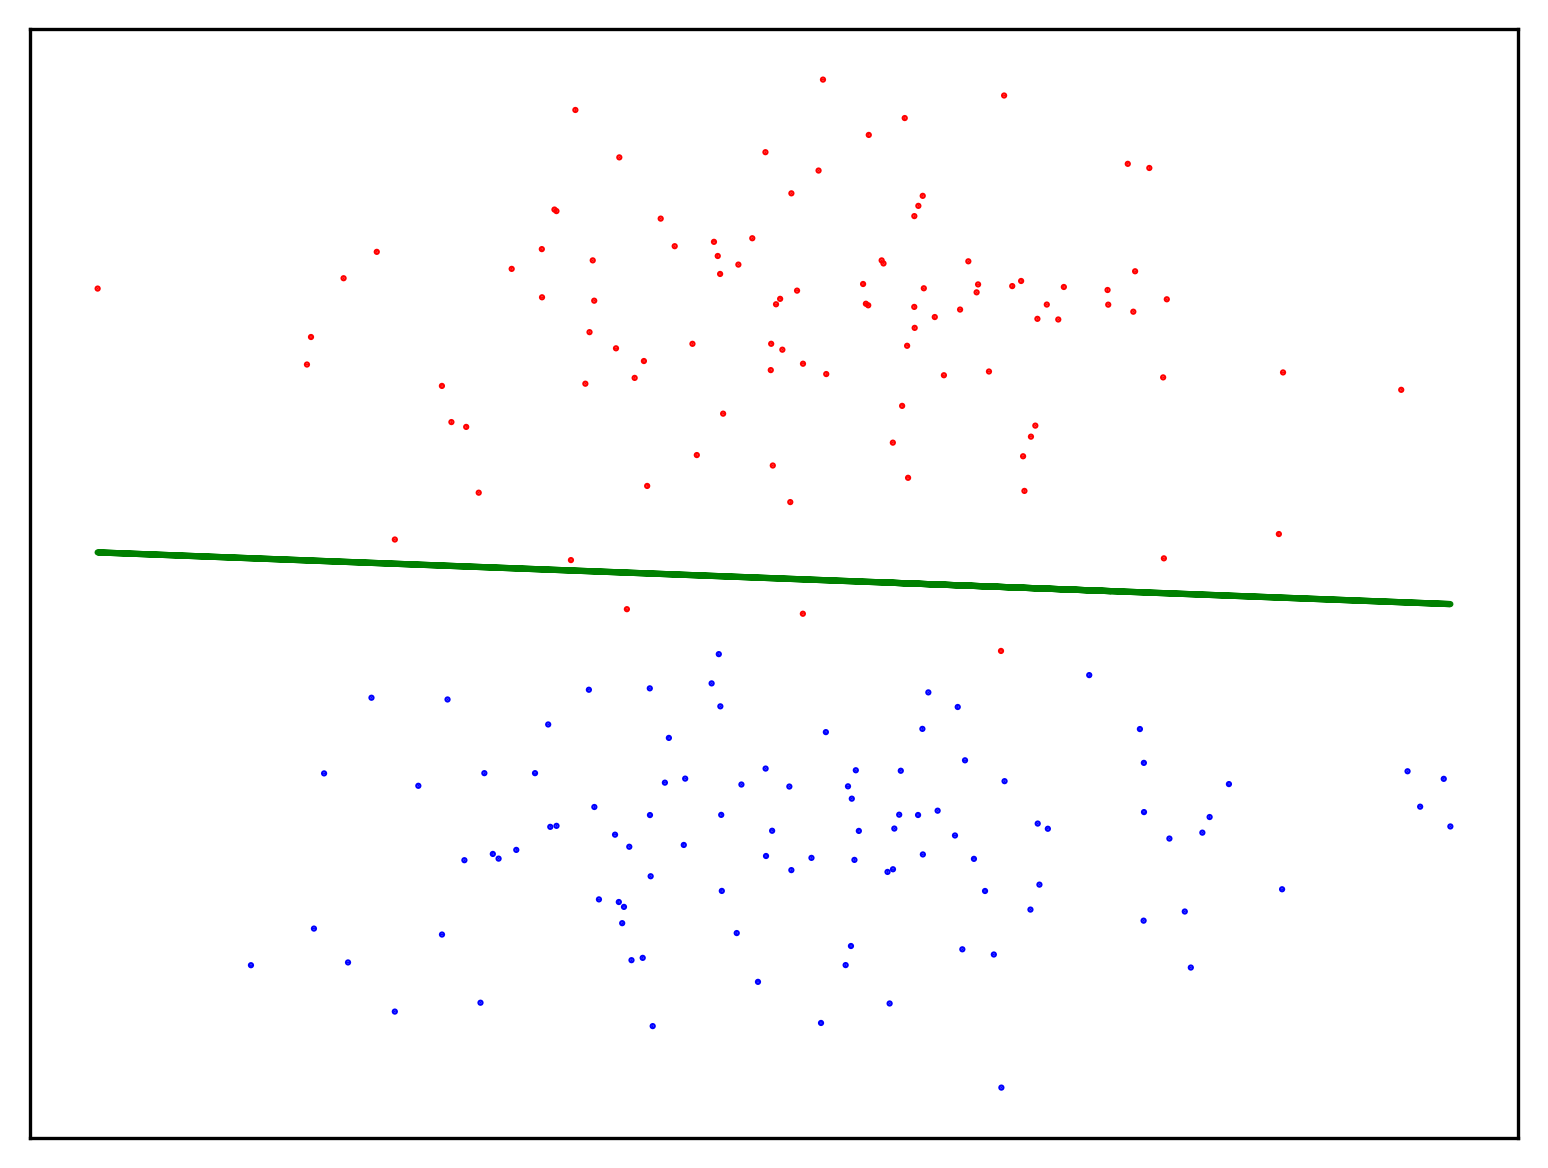

In [40]:
X, y = sklearn.datasets.make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, class_sep=2)
W = np.array([0.,0.,0.])
for _ in range(10):
    W = logistic_regression(0.001, 10, W, y, X)

f, ax = new_plot()
colors = ["blue", "red"]
ax.scatter(X[:, 0], X[:, 1], marker=".", c=y, s=1, cmap=mpl.colors.ListedColormap(colors))
ax.plot(X[:, 0], [X[i, 0] * (W[1] / (-1 * W[2])) + W[0] for i in range(X.shape[0])], 'green')